In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test confidence level of group1
    - test classifier trained on group1 on files of other groups and see if it' will
    be confused and produce close probs for all classes

In [13]:
import sys; sys.path.append('../')
from DataPreparing.data_preparing import *
from DataPreparing.HandleClassImbalance import *
from Evaluation.evaluate import *
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,SMOTENC,SMOTEN,BorderlineSMOTE
from imblearn.under_sampling import NearMiss,RandomUnderSampler
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val, y_train, y_val =read_data("../DataFiles/gcn_new_embeddings2/group1/group1.csv", drop_1st_col=True)

In [15]:
%%time
clf = svm.SVC( kernel='rbf', probability=True)
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val , clf.predict(X_train), y_train)

Training Accurracy: 98.6390243902439%
              precision    recall  f1-score   support

      CWE121       1.00      1.00      1.00      1191
      CWE122       0.99      0.97      0.98      1665
      CWE190       0.93      1.00      0.97       970
       CWE78       1.00      0.97      0.99      1300

    accuracy                           0.98      5126
   macro avg       0.98      0.99      0.98      5126
weighted avg       0.98      0.98      0.98      5126

CPU times: total: 2min 45s
Wall time: 2min 50s


In [16]:
save_model(clf, "rbf_svm_group1prop")

In [5]:
probabilities = clf.predict_proba(X_val)
print(len(probabilities[0]))

4


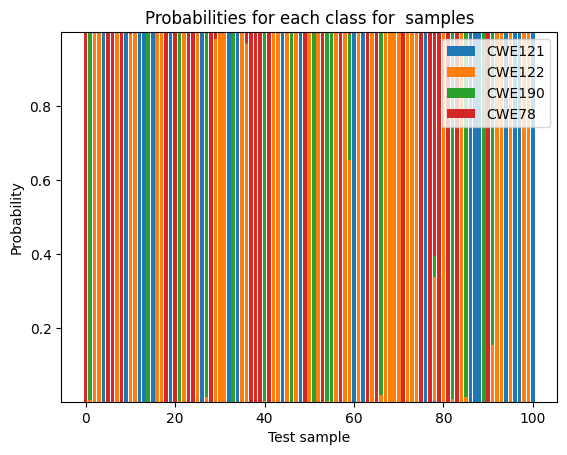

In [6]:
show_probs(probabilities[:101], clf,"")


In [7]:
X_train2, X_val2, y_train2, y_val2 =read_data("../DataFiles/gcn_new_embeddings2/group2/group2.csv", drop_1st_col=True)

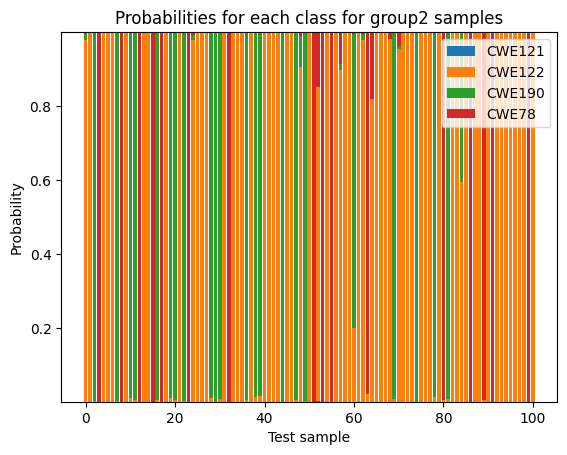

In [8]:
probabilities2 = clf.predict_proba(X_val2)
show_probs(probabilities2[:101], clf,"group2")


In [9]:
X_train3, X_val3, y_train3, y_val3 =read_data("../DataFiles/gcn_new_embeddings2/group3/group3.csv", drop_1st_col=True)

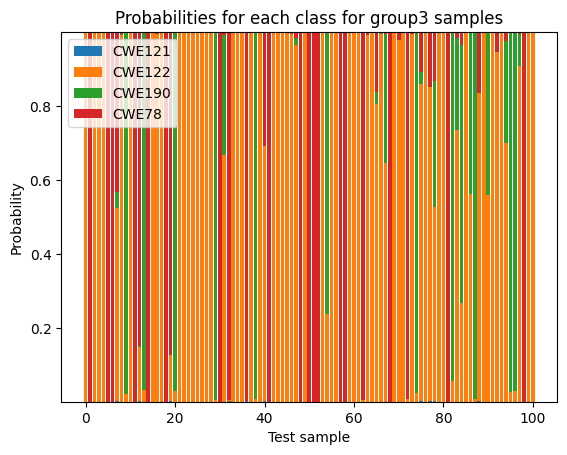

In [10]:
probabilities3 = clf.predict_proba(X_val3)
show_probs(probabilities3[:101], clf,"group3")


In [11]:
X_train4, X_val4, y_train4, y_val4 =read_data("../DataFiles/gcn_new_embeddings2/group4/group4.csv", drop_1st_col=True)

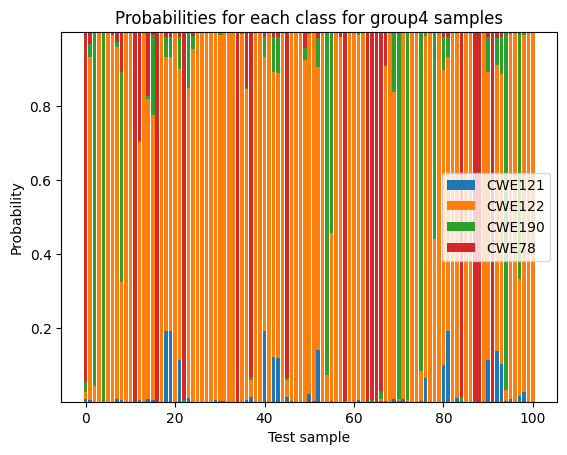

In [17]:
probabilities4 = clf.predict_proba(X_val4)
show_probs(probabilities4[:101], clf,"group4")